<a href="https://colab.research.google.com/github/meiladrahmani556/marine-cbm-ml-dissertation/blob/main/JupyterNotebook/04_baseline_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
PROJECT_PATH = "/content/drive/MyDrive/✨CBM Data for Marine System Monitoring & Analysis✨"

In [19]:
import os
os.makedirs("data/processed", exist_ok=True)

# 📓 Notebook 04 – Baseline Model Development

## 🎯 Objective

This notebook develops and evaluates baseline regression models to predict gas turbine degradation using the preprocessed Marine CBM dataset.

Two models are implemented:

1. Linear Regression (baseline linear model)
2. Random Forest Regressor (non-linear ensemble model)

The purpose is to:

- Establish baseline predictive performance
- Compare linear and non-linear modelling behaviour
- Evaluate model generalisation
- Interpret results in an engineering context

Target Variable:
**GT Compressor decay state coefficient**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

## 📂 Load Preprocessed Data

Data was cleaned, scaled, and split in Notebook 03.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Conditional_Base_Monitoring in Marine_System.csv to Conditional_Base_Monitoring in Marine_System.csv


In [32]:
df = pd.read_csv("Conditional_Base_Monitoring in Marine_System.csv")

# Clean columns
df.columns = df.columns.str.strip()

# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Remove missing and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Define target
target_column = "GT Compressor decay state coefficient"

X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((9548, 17), (2388, 17))

In [20]:
import os
os.listdir()

['.config',
 'drive',
 'Conditional_Base_Monitoring in Marine_System.csv',
 'data',
 'sample_data']

In [21]:
os.listdir("data")

['processed']

In [30]:
os.listdir("data/processed")

[]

In [25]:
df.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [26]:
df.columns = df.columns.str.strip()

In [27]:
target_column = "GT Compressor decay state coefficient"

In [28]:
X = df.drop(columns=[target_column])
y = df[target_column]

Column names were stripped of leading and trailing whitespace to ensure consistency and prevent indexing errors.

## 🧠 Model Selection Rationale

### Linear Regression

Linear Regression is selected as a baseline model because:

- It provides interpretability
- It assumes linear relationships between sensor measurements and degradation
- It allows identification of basic predictive capability

However, gas turbine degradation behaviour is typically nonlinear due to:

- Thermodynamic interactions
- Load variations
- Sensor coupling effects

Therefore, a non-linear model is also required.

### Random Forest Regressor

Random Forest is chosen because:

- It captures nonlinear relationships
- It is robust to noise
- It handles feature interactions automatically
- It reduces overfitting via ensemble averaging

This comparison allows evaluation of whether degradation behaviour is predominantly linear or nonlinear.

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [34]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R²:", r2_lr)

Linear Regression
MAE: 0.00335005818650946
RMSE: 0.0046767023890238076
R²: 0.9014150343411496


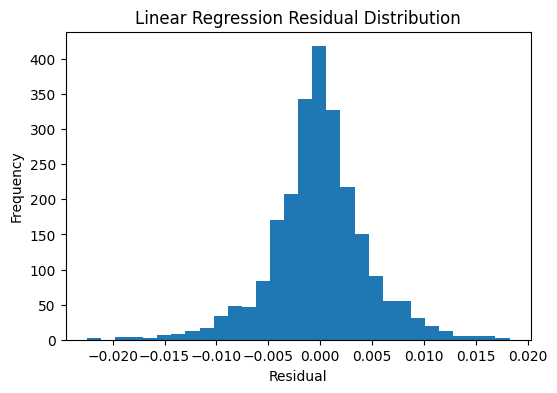

In [35]:
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(6,4))
plt.hist(residuals_lr, bins=30)
plt.title("Linear Regression Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [36]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [37]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest
MAE: 0.00040280988274698967
RMSE: 0.00063959712704519
R²: 0.9981560708462252


In [40]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
9,GT Compressor outlet air temperature (T2) [C],0.300027
10,HP Turbine exit pressure (P48) [bar],0.185504
13,GT exhaust gas pressure (Pexh) [bar],0.146899
2,Gas Turbine (GT) shaft torque (GTT) [kN m],0.146726
4,Gas Generator rate of revolutions (GGn) [rpm],0.131508
3,GT rate of revolutions (GTn) [rpm],0.032441
16,GT Turbine decay state coefficient,0.016569
14,Turbine Injecton Control (TIC) [%],0.010483
6,Port Propeller Torque (Tp) [kN],0.006896
5,Starboard Propeller Torque (Ts) [kN],0.006238


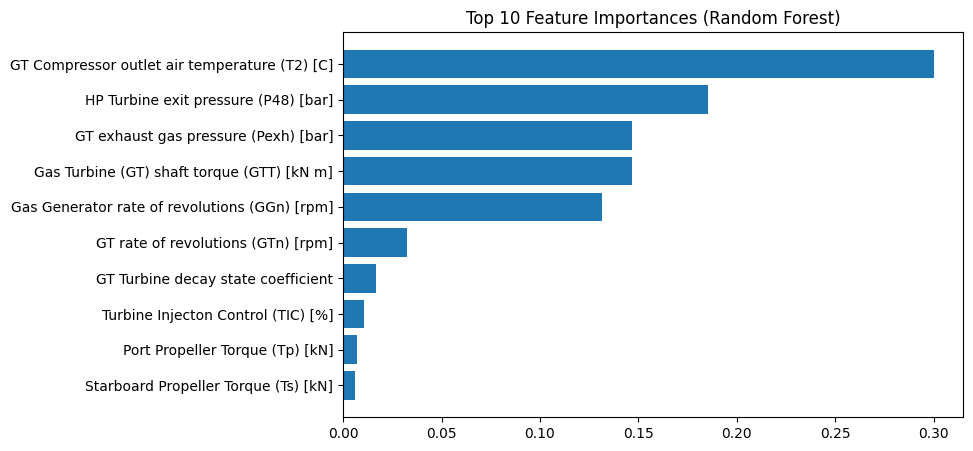

In [41]:
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"][:10],
         importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [42]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})

results

,Model,MAE,RMSE,R²
0,Linear Regression,0.003350,0.004677,0.901415
1,Random Forest,0.000403,0.000640,0.998156


## 📊 Interpretation of Results

If Random Forest significantly outperforms Linear Regression:

- The degradation process is likely nonlinear
- Sensor interactions contribute complex behaviour
- Ensemble methods better capture system dynamics

If Linear Regression performs similarly:

- Relationships may be predominantly linear
- System degradation may be approximated by linear trends

The model with higher R² and lower RMSE demonstrates superior predictive capability.

Further optimisation will be performed in Notebook 05.

In [43]:
import os
os.makedirs("models", exist_ok=True)

joblib.dump(lr_model, "models/linear_regression.pkl")
joblib.dump(rf_model, "models/random_forest.pkl")

['models/random_forest.pkl']